**Research Question 1**

Player Performance Prediction: Can we accurately predict which NFL players are likely
to be the top performers in the upcoming season, considering both traditional and
points-per-reception formats? To achieve this, we will analyze statistical trends and
patterns among the top 200 performing players from previous seasons, focusing on
metrics such as passing, rushing, and receiving yards, as well as touchdowns. By
employing regression models, variable correlations, and predictive analyses, we aim to
achieve a predictive accuracy of at least 60-70%.

In [ ]:
import pandas as pd

In [ ]:
url='https://docs.google.com/spreadsheets/d/145pyiVvE8gqLRDSG6dYUD0cy-pi8JUIdwsyrMdhgsFU/edit#gid=0'

In [ ]:
import re

def convert_google_sheet_url(url):
    # Regular expression to match and capture the necessary part of the URL
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    # Replace function to construct the new URL for CSV export
    # If gid is present in the URL, it includes it in the export URL, otherwise, it's omitted
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    # Replace using regex
    new_url = re.sub(pattern, replacement, url)

    return new_url

In [ ]:
import pandas as pd


new_url = convert_google_sheet_url(url)

print(new_url)
# https://docs.google.com/spreadsheets/d/1mSEJtzy5L0nuIMRlY9rYdC5s899Ptu2gdMJcIalr5pg/export?gid=1606352415&format=csv

https://docs.google.com/spreadsheets/d/145pyiVvE8gqLRDSG6dYUD0cy-pi8JUIdwsyrMdhgsFU/export?gid=0&format=csv


In [ ]:
data = pd.read_csv(new_url)

In [ ]:
# Converting all column names to strings.
data.columns = data.columns.astype(str)

In [ ]:
# Replace NaN values with 0
data.fillna(0, inplace=True)

In [ ]:
#Displaying Columns
data.columns

Index(['Year', 'Rk', 'Player', 'Tm', 'FantPos', 'Age', 'G', 'Games Started',
       'Passing Yds', 'Passing TD', 'Int', 'Att', 'Rushing Yds', 'Y/A',
       ' Rushing TD', 'Rec', 'Receiving Yds', 'Y/R', 'Receiving TD', 'Fmb',
       'FL', 'FantPt', 'PosRank', 'OvRank'],
      dtype='object')

In [ ]:
#Checking the Values of Games Started Column
data['Games Started']

0       16
1       17
2       17
3       16
4       17
        ..
3995     3
3996    12
3997     7
3998     4
3999    10
Name: Games Started, Length: 4000, dtype: int64

In [ ]:
# Displaying Top 5 rows
data.head()

,Year,Rk,Player,Tm,FantPos,Age,G,Games Started,Passing Yds,Passing TD,...,Rushing TD,Rec,Receiving Yds,Y/R,Receiving TD,Fmb,FL,FantPt,PosRank,OvRank
0,2023,1,Christian McCaffrey*+,SFO,RB,27,16,16,0,0,...,14,67,564,8.42,7,3,2.0,324,1,1.0
1,2023,2,CeeDee Lamb*+,DAL,WR,24,17,17,0,0,...,2,135,1749,12.96,12,3,2.0,268,1,2.0
2,2023,3,Josh Allen,BUF,QB,27,17,17,4306,29,...,15,0,0,0.00,0,7,4.0,393,1,3.0
3,2023,4,Tyreek Hill*+,MIA,WR,29,16,16,0,0,...,0,119,1799,15.12,13,1,1.0,257,2,4.0
4,2023,5,Jalen Hurts*,PHI,QB,25,17,17,3858,23,...,15,0,0,0.00,0,9,5.0,357,2,5.0


In [ ]:
#Display thr Shape of the Dataset
data.shape

(4000, 24)

In [ ]:
#Summary of the Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4000 non-null   int64  
 1   Rk             4000 non-null   int64  
 2   Player         4000 non-null   object 
 3   Tm             4000 non-null   object 
 4   FantPos        4000 non-null   object 
 5   Age            4000 non-null   int64  
 6   G              4000 non-null   int64  
 7   Games Started  4000 non-null   int64  
 8   Passing Yds    4000 non-null   int64  
 9   Passing TD     4000 non-null   int64  
 10  Int            4000 non-null   int64  
 11  Att            4000 non-null   int64  
 12  Rushing Yds    4000 non-null   int64  
 13  Y/A            4000 non-null   float64
 14   Rushing TD    4000 non-null   int64  
 15  Rec            4000 non-null   int64  
 16  Receiving Yds  4000 non-null   int64  
 17  Y/R            4000 non-null   float64
 18  Receivin

In [ ]:
#Finding the Length of Unique
len(data['Player'].unique())

1447

In [ ]:
# Displaying top 5 player names to analyse
data['Player'].head()

0    Christian McCaffrey*+
1            CeeDee Lamb*+
2               Josh Allen
3            Tyreek Hill*+
4             Jalen Hurts*
Name: Player, dtype: object

In [ ]:

# Remove special characters from 'Player' column
data['Player'] = data['Player'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', ' ').str.strip()


In [ ]:
#Player names after removing special characters
data['Player'].head()

0    christian mccaffrey*+
1            ceedee lamb*+
2               josh allen
3            tyreek hill*+
4             jalen hurts*
Name: Player, dtype: object

In [ ]:
# Again looking at the summary of the dataframe after preprocessing steps
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4000 non-null   int64  
 1   Rk             4000 non-null   int64  
 2   Player         4000 non-null   object 
 3   Tm             4000 non-null   object 
 4   FantPos        4000 non-null   object 
 5   Age            4000 non-null   int64  
 6   G              4000 non-null   int64  
 7   Games Started  4000 non-null   int64  
 8   Passing Yds    4000 non-null   int64  
 9   Passing TD     4000 non-null   int64  
 10  Int            4000 non-null   int64  
 11  Att            4000 non-null   int64  
 12  Rushing Yds    4000 non-null   int64  
 13  Y/A            4000 non-null   float64
 14   Rushing TD    4000 non-null   int64  
 15  Rec            4000 non-null   int64  
 16  Receiving Yds  4000 non-null   int64  
 17  Y/R            4000 non-null   float64
 18  Receivin

Creating a Mapping dictionary to label to keep track the mapping values of the column values after the peforming Label Encoding

In [ ]:
mapping_dict = {}

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_encoder = LabelEncoder()
data_label_encoded = data.copy()
for column in data_label_encoded.columns:
    if data_label_encoded[column].dtype == 'object':
        # Encode only if dtype is 'object'
        data_label_encoded[column] = label_encoder.fit_transform(data_label_encoded[column])
    # Store the mapping for the column
        mapping_dict[column] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

print("Label Encoded DataFrame:")
data_label_encoded.head()

Label Encoded DataFrame:


,Year,Rk,Player,Tm,FantPos,Age,G,Games Started,Passing Yds,Passing TD,...,Rushing TD,Rec,Receiving Yds,Y/R,Receiving TD,Fmb,FL,FantPt,PosRank,OvRank
0,2023,1,272,32,2,27,16,16,0,0,...,14,67,564,8.42,7,3,2.0,324,1,1.0
1,2023,2,225,10,4,24,17,17,0,0,...,2,135,1749,12.96,12,3,2.0,268,1,2.0
2,2023,3,764,5,1,27,17,17,4306,29,...,15,0,0,0.00,0,7,4.0,393,1,3.0
3,2023,4,1395,21,4,29,16,16,0,0,...,0,119,1799,15.12,13,1,1.0,257,2,4.0
4,2023,5,623,28,1,25,17,17,3858,23,...,15,0,0,0.00,0,9,5.0,357,2,5.0


In [ ]:
mapping_dict

{'Player': {'a.j. brown': 0,
  'a.j. brown*': 1,
  'a.j. feeley': 2,
  'a.j. green': 3,
  'a.j. green*': 4,
  'aaron brooks': 5,
  'aaron dobson': 6,
  'aaron hernandez': 7,
  'aaron jones': 8,
  'aaron jones*': 9,
  'aaron rodgers': 10,
  'aaron rodgers*': 11,
  'aaron rodgers*+': 12,
  'aaron stecker': 13,
  'ace sanders': 14,
  'adam humphries': 15,
  'adam thielen': 16,
  'adam thielen*': 17,
  'adrian peterson': 18,
  'adrian peterson*': 19,
  'adrian peterson*+': 20,
  'ahmad bradshaw': 21,
  'ahman green': 22,
  'ahman green*': 23,
  "aidan o'connell": 24,
  'aj dillon': 25,
  'albert wilson': 26,
  'alec pierce': 27,
  'alex collins': 28,
  'alex green': 29,
  'alex smith': 30,
  'alex smith*': 31,
  'alexander mattison': 32,
  'alfred blue': 33,
  'alfred morris': 34,
  'alfred morris*': 35,
  'alge crumpler': 36,
  'alge crumpler*': 37,
  'allen hurns': 38,
  'allen lazard': 39,
  'allen robinson': 40,
  'allen robinson*': 41,
  'alshon jeffery': 42,
  'alshon jeffery*': 43,


In [ ]:
data_label_encoded.columns

Index(['Year', 'Rk', 'Player', 'Tm', 'FantPos', 'Age', 'G', 'Games Started',
       'Passing Yds', 'Passing TD', 'Int', 'Att', 'Rushing Yds', 'Y/A',
       ' Rushing TD', 'Rec', 'Receiving Yds', 'Y/R', 'Receiving TD', 'Fmb',
       'FL', 'FantPt', 'PosRank', 'OvRank'],
      dtype='object')

In [ ]:
# Define features (X) and target variable (y)
# Let's say we want to predict "FantPt" and "PPR" (Fantasy Points and Points Per Reception)
features = data_label_encoded[['Age','Games Started','Passing Yds','Int','Receiving Yds','Rushing Yds',' Rushing TD','Receiving TD','Fmb']]
X = features
y_fantpt = data_label_encoded['FantPt']  # Fantasy Points
#y_ppr = data_label_encoded['PPR']  # Points Per Reception

In [ ]:
features.columns

Index(['Age', 'Games Started', 'Passing Yds', 'Int', 'Receiving Yds',
       'Rushing Yds', ' Rushing TD', 'Receiving TD', 'Fmb'],
      dtype='object')

In [ ]:
features

,Age,Games Started,Passing Yds,Int,Receiving Yds,Rushing Yds,Rushing TD,Receiving TD,Fmb
0,27,16,0,0,564,1459,14,7,3
1,24,17,0,0,1749,113,2,12,3
2,27,17,4306,18,0,524,15,0,7
3,29,16,0,0,1799,15,0,13,1
4,25,17,3858,15,0,605,15,0,9
...,...,...,...,...,...,...,...,...,...
3995,36,3,0,0,497,9,0,0,0
3996,29,12,0,0,203,0,0,5,1
3997,23,7,1231,9,0,7,0,0,5
3998,23,4,0,0,68,311,2,1,3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_fantpt, test_size=0.2, random_state=42)

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr_train = model_lr.predict(X_train)
predictions_lr_test = model_lr.predict(X_test)


In [ ]:

# Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf_train = model_rf.predict(X_train)
predictions_rf_test = model_rf.predict(X_test)

In [ ]:

# Gradient Boosting
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)
predictions_gb_train = model_gb.predict(X_train)
predictions_gb_test = model_gb.predict(X_test)

In [ ]:
# Decision Tree
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
predictions_dt_train = model_dt.predict(X_train)
predictions_dt_test = model_dt.predict(X_test)

In [ ]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
predictions_poly_train = model_poly.predict(X_train_poly)
predictions_poly_test = model_poly.predict(X_test_poly)

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
# Initialize SVM regressor
svm_regressor = SVR(kernel='rbf')  # RBF kernel is commonly used for SVM regression

# Train the model
svm_regressor.fit(X_train, y_train)

# Make predictions on train and test sets
svm_train_predictions = svm_regressor.predict(X_train)
svm_test_predictions = svm_regressor.predict(X_test)


In [ ]:
# Train SVM regressor with bagging
bagged_svm_regressor = BaggingRegressor(base_estimator=SVR(kernel='rbf'), n_estimators=10, random_state=42)
bagged_svm_regressor.fit(X_train, y_train)

# Make predictions on train and test sets
bagged_svm_train_predictions = bagged_svm_regressor.predict(X_train)
bagged_svm_test_predictions = bagged_svm_regressor.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:

pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBoost Regressor
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)
predictions_xgb_train = model_xgb.predict(X_train)
predictions_xgb_test = model_xgb.predict(X_test)

In [ ]:
# Define a function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, r2, mae, rmse

# Calculate evaluation metrics for each model
metrics = {}

# Linear Regression
metrics['Linear Regression'] = calculate_metrics(y_train, predictions_lr_train), calculate_metrics(y_test, predictions_lr_test)

# Random Forest
metrics['Random Forest'] = calculate_metrics(y_train, predictions_rf_train), calculate_metrics(y_test, predictions_rf_test)

# Gradient Boosting
metrics['Gradient Boosting'] = calculate_metrics(y_train, predictions_gb_train), calculate_metrics(y_test, predictions_gb_test)

# Decision Tree
metrics['Decision Tree'] = calculate_metrics(y_train, predictions_dt_train), calculate_metrics(y_test, predictions_dt_test)

# Polynomial Regression
metrics['Polynomial Regression'] = calculate_metrics(y_train, predictions_poly_train), calculate_metrics(y_test, predictions_poly_test)

# SVM
metrics['SVM'] = calculate_metrics(y_train, svm_train_predictions), calculate_metrics(y_test, svm_test_predictions)

# Bagged SVM
metrics['Bagged SVM'] = calculate_metrics(y_train, bagged_svm_train_predictions), calculate_metrics(y_test, bagged_svm_test_predictions)

# XGBoost
metrics['XGBoost'] = calculate_metrics(y_train, predictions_xgb_train), calculate_metrics(y_test, predictions_xgb_test)

# Print evaluation metrics
for model, (train_metrics, test_metrics) in metrics.items():
    print(f"\n{model}:")
    print("Train - MSE: {:.2f}, R2: {:.2f}, MAE: {:.2f}, RMSE: {:.2f}".format(*train_metrics))
    print("Test - MSE: {:.2f}, R2: {:.2f}, MAE: {:.2f}, RMSE: {:.2f}".format(*test_metrics))



Linear Regression:
Train - MSE: 62.81, R2: 0.99, MAE: 3.87, RMSE: 7.93
Test - MSE: 61.63, R2: 0.99, MAE: 3.86, RMSE: 7.85

Random Forest:
Train - MSE: 17.89, R2: 1.00, MAE: 2.32, RMSE: 4.23
Test - MSE: 155.76, R2: 0.97, MAE: 6.78, RMSE: 12.48

Gradient Boosting:
Train - MSE: 74.10, R2: 0.98, MAE: 5.81, RMSE: 8.61
Test - MSE: 133.04, R2: 0.97, MAE: 7.20, RMSE: 11.53

Decision Tree:
Train - MSE: 0.00, R2: 1.00, MAE: 0.00, RMSE: 0.00
Test - MSE: 277.04, R2: 0.94, MAE: 9.70, RMSE: 16.64

Polynomial Regression:
Train - MSE: 55.04, R2: 0.99, MAE: 3.66, RMSE: 7.42
Test - MSE: 60.15, R2: 0.99, MAE: 3.84, RMSE: 7.76

SVM:
Train - MSE: 582.02, R2: 0.87, MAE: 15.78, RMSE: 24.13
Test - MSE: 675.61, R2: 0.86, MAE: 16.96, RMSE: 25.99

Bagged SVM:
Train - MSE: 578.78, R2: 0.87, MAE: 15.76, RMSE: 24.06
Test - MSE: 674.54, R2: 0.86, MAE: 16.96, RMSE: 25.97

XGBoost:
Train - MSE: 5.89, R2: 1.00, MAE: 1.65, RMSE: 2.43
Test - MSE: 154.82, R2: 0.97, MAE: 6.52, RMSE: 12.44


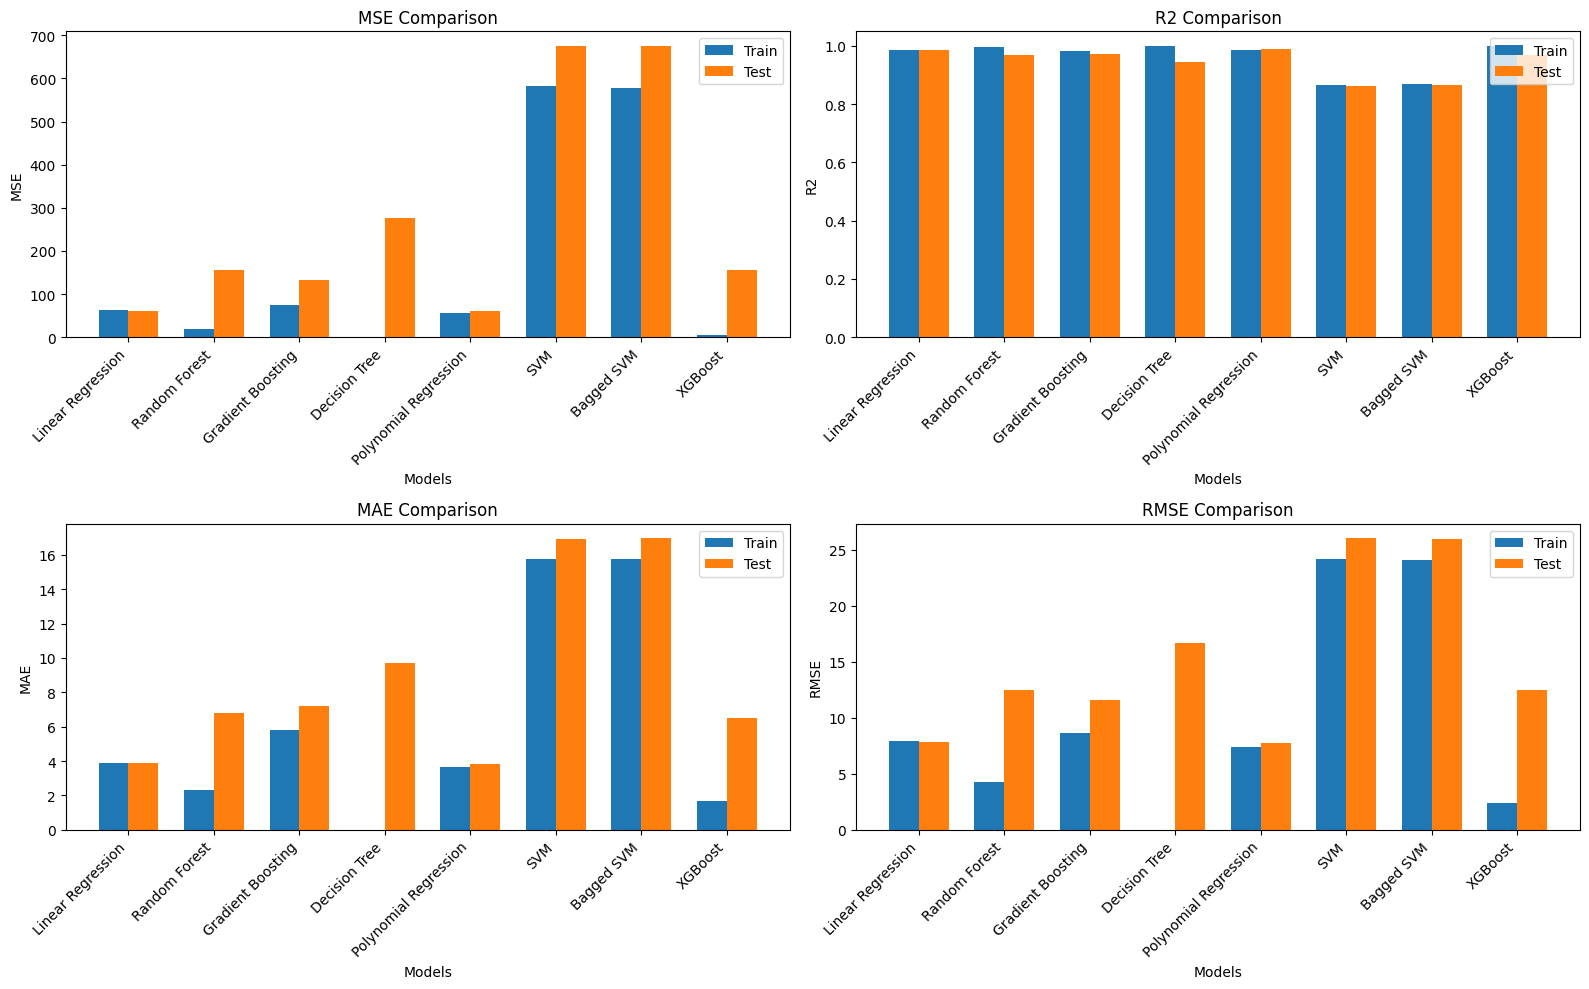

In [ ]:
import matplotlib.pyplot as plt

# Extract evaluation metrics from the dictionary
models = list(metrics.keys())
train_mse = [train_metrics[0] for _, (train_metrics, _) in metrics.items()]
test_mse = [test_metrics[0] for _, (_, test_metrics) in metrics.items()]
train_r2 = [train_metrics[1] for _, (train_metrics, _) in metrics.items()]
test_r2 = [test_metrics[1] for _, (_, test_metrics) in metrics.items()]
train_mae = [train_metrics[2] for _, (train_metrics, _) in metrics.items()]
test_mae = [test_metrics[2] for _, (_, test_metrics) in metrics.items()]
train_rmse = [train_metrics[3] for _, (train_metrics, _) in metrics.items()]
test_rmse = [test_metrics[3] for _, (_, test_metrics) in metrics.items()]

num_models = len(models)

# Set up the bar plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

# Position of bars on the x-axis
bar_positions = np.arange(num_models)

# Width of bars
bar_width = 0.35

# Plot the bars for each metric
for ax, metric_name, train_metric, test_metric in zip(axes, ['MSE', 'R2', 'MAE', 'RMSE'], [train_mse, train_r2, train_mae, train_rmse], [test_mse, test_r2, test_mae, test_rmse]):
    ax.bar(bar_positions, train_metric, bar_width, label='Train')
    ax.bar(bar_positions + bar_width, test_metric, bar_width, label='Test')
    ax.set_xticks(bar_positions + bar_width / 2)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} Comparison')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import xgboost as xgb

# Define a function for hyperparameter tuning and evaluation
def tune_and_evaluate_model(model, param_grid, X_train, X_test, y_train, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    return best_model, best_params, mse_train, mse_test, r2_train, r2_test, mae_train, mae_test, rmse_train, rmse_test

# Define a function for evaluating model without hyperparameter tuning
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    return mse_train, mse_test, r2_train, r2_test, mae_train, mae_test, rmse_train, rmse_test

# Example data
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_fantpt, test_size=0.2, random_state=42)

# Define evaluation metrics dictionary
eval_metrics = {}

# Linear Regression
linear_model = LinearRegression()
linear_mse_train, linear_mse_test, linear_r2_train, linear_r2_test, linear_mae_train, linear_mae_test, linear_rmse_train, linear_rmse_test = evaluate_model(linear_model, X_train, X_test, y_train, y_test)
eval_metrics['Linear Regression'] = {'Train': (linear_mse_train, linear_r2_train, linear_mae_train, linear_rmse_train), 'Test': (linear_mse_test, linear_r2_test, linear_mae_test, linear_rmse_test)}

# Ridge Regression
ridge_param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_model = Ridge()
best_ridge_model, ridge_best_params, ridge_mse_train, ridge_mse_test, ridge_r2_train, ridge_r2_test, ridge_mae_train, ridge_mae_test, ridge_rmse_train, ridge_rmse_test = tune_and_evaluate_model(ridge_model, ridge_param_grid, X_train, X_test, y_train, y_test)
eval_metrics['Ridge Regression'] = {'Train': (ridge_mse_train, ridge_r2_train, ridge_mae_train, ridge_rmse_train), 'Test': (ridge_mse_test, ridge_r2_test, ridge_mae_test, ridge_rmse_test)}

# Random Forest Regressor
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20, 30]}
rf_model = RandomForestRegressor()
best_rf_model, rf_best_params, rf_mse_train, rf_mse_test, rf_r2_train, rf_r2_test, rf_mae_train, rf_mae_test, rf_rmse_train, rf_rmse_test = tune_and_evaluate_model(rf_model, rf_param_grid, X_train, X_test, y_train, y_test)
eval_metrics['Random Forest Regression'] = {'Train': (rf_mse_train, rf_r2_train, rf_mae_train, rf_rmse_train), 'Test': (rf_mse_test, rf_r2_test, rf_mae_test, rf_rmse_test)}

# Gradient Boosting Regressor
gb_param_grid = {'n_estimators': [100, 200, 300],
                 'learning_rate': [0.01, 0.1, 0.2]}
gb_model = GradientBoostingRegressor()
best_gb_model, gb_best_params, gb_mse_train, gb_mse_test, gb_r2_train, gb_r2_test, gb_mae_train, gb_mae_test, gb_rmse_train, gb_rmse_test = tune_and_evaluate_model(gb_model, gb_param_grid, X_train, X_test, y_train, y_test)
eval_metrics['Gradient Boosting Regression'] = {'Train': (gb_mse_train, gb_r2_train, gb_mae_train, gb_rmse_train), 'Test': (gb_mse_test, gb_r2_test, gb_mae_test, gb_rmse_test)}

# Decision Tree Regressor
dt_param_grid = {'max_depth': [None, 10, 20, 30]}
dt_model = DecisionTreeRegressor()
best_dt_model, dt_best_params, dt_mse_train, dt_mse_test, dt_r2_train, dt_r2_test, dt_mae_train, dt_mae_test, dt_rmse_train, dt_rmse_test = tune_and_evaluate_model(dt_model, dt_param_grid, X_train, X_test, y_train, y_test)
eval_metrics['Decision Tree Regression'] = {'Train': (dt_mse_train, dt_r2_train, dt_mae_train, dt_rmse_train), 'Test': (dt_mse_test, dt_r2_test, dt_mae_test, dt_rmse_test)}

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg_model = Ridge()
best_poly_reg_model, poly_best_params, poly_mse_train, poly_mse_test, poly_r2_train, poly_r2_test, poly_mae_train, poly_mae_test, poly_rmse_train, poly_rmse_test = tune_and_evaluate_model(poly_reg_model, ridge_param_grid, X_poly_train, X_poly_test, y_train, y_test)
eval_metrics['Polynomial Regression'] = {'Train': (poly_mse_train, poly_r2_train, poly_mae_train, poly_rmse_train), 'Test': (poly_mse_test, poly_r2_test, poly_mae_test, poly_rmse_test)}

# XGBoost Regressor
xgb_param_grid = {'max_depth': [3, 5, 7],
                  'learning_rate': [0.01, 0.1, 0.2],
                  'n_estimators': [100, 200, 300]}
xgb_model = xgb.XGBRegressor()
best_xgb_model, xgb_best_params, xgb_mse_train, xgb_mse_test, xgb_r2_train, xgb_r2_test, xgb_mae_train, xgb_mae_test, xgb_rmse_train, xgb_rmse_test = tune_and_evaluate_model(xgb_model, xgb_param_grid, X_train, X_test, y_train, y_test)
eval_metrics['XGBoost Regression'] = {'Train': (xgb_mse_train, xgb_r2_train, xgb_mae_train, xgb_rmse_train), 'Test': (xgb_mse_test, xgb_r2_test, xgb_mae_test, xgb_rmse_test)}

# Print evaluation metrics
for name, metrics in eval_metrics.items():
    print(f"\n{name}:")
    for dataset, (mse, r2, mae, rmse) in metrics.items():
        print(f"{dataset} - MSE: {mse:.2f}, R2: {r2:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.47041e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.41508e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.43896e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49081e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin


Linear Regression:
Train - MSE: 62.81, R2: 0.99, MAE: 3.87, RMSE: 7.93
Test - MSE: 61.63, R2: 0.99, MAE: 3.86, RMSE: 7.85

Ridge Regression:
Train - MSE: 62.81, R2: 0.99, MAE: 3.87, RMSE: 7.93
Test - MSE: 61.62, R2: 0.99, MAE: 3.86, RMSE: 7.85

Random Forest Regression:
Train - MSE: 16.96, R2: 1.00, MAE: 2.34, RMSE: 4.12
Test - MSE: 152.98, R2: 0.97, MAE: 6.70, RMSE: 12.37

Gradient Boosting Regression:
Train - MSE: 34.01, R2: 0.99, MAE: 3.77, RMSE: 5.83
Test - MSE: 106.90, R2: 0.98, MAE: 5.83, RMSE: 10.34

Decision Tree Regression:
Train - MSE: 0.00, R2: 1.00, MAE: 0.00, RMSE: 0.00
Test - MSE: 275.96, R2: 0.94, MAE: 9.75, RMSE: 16.61

Polynomial Regression:
Train - MSE: 55.05, R2: 0.99, MAE: 3.66, RMSE: 7.42
Test - MSE: 60.12, R2: 0.99, MAE: 3.84, RMSE: 7.75

XGBoost Regression:
Train - MSE: 44.14, R2: 0.99, MAE: 4.15, RMSE: 6.64
Test - MSE: 109.64, R2: 0.98, MAE: 5.95, RMSE: 10.47


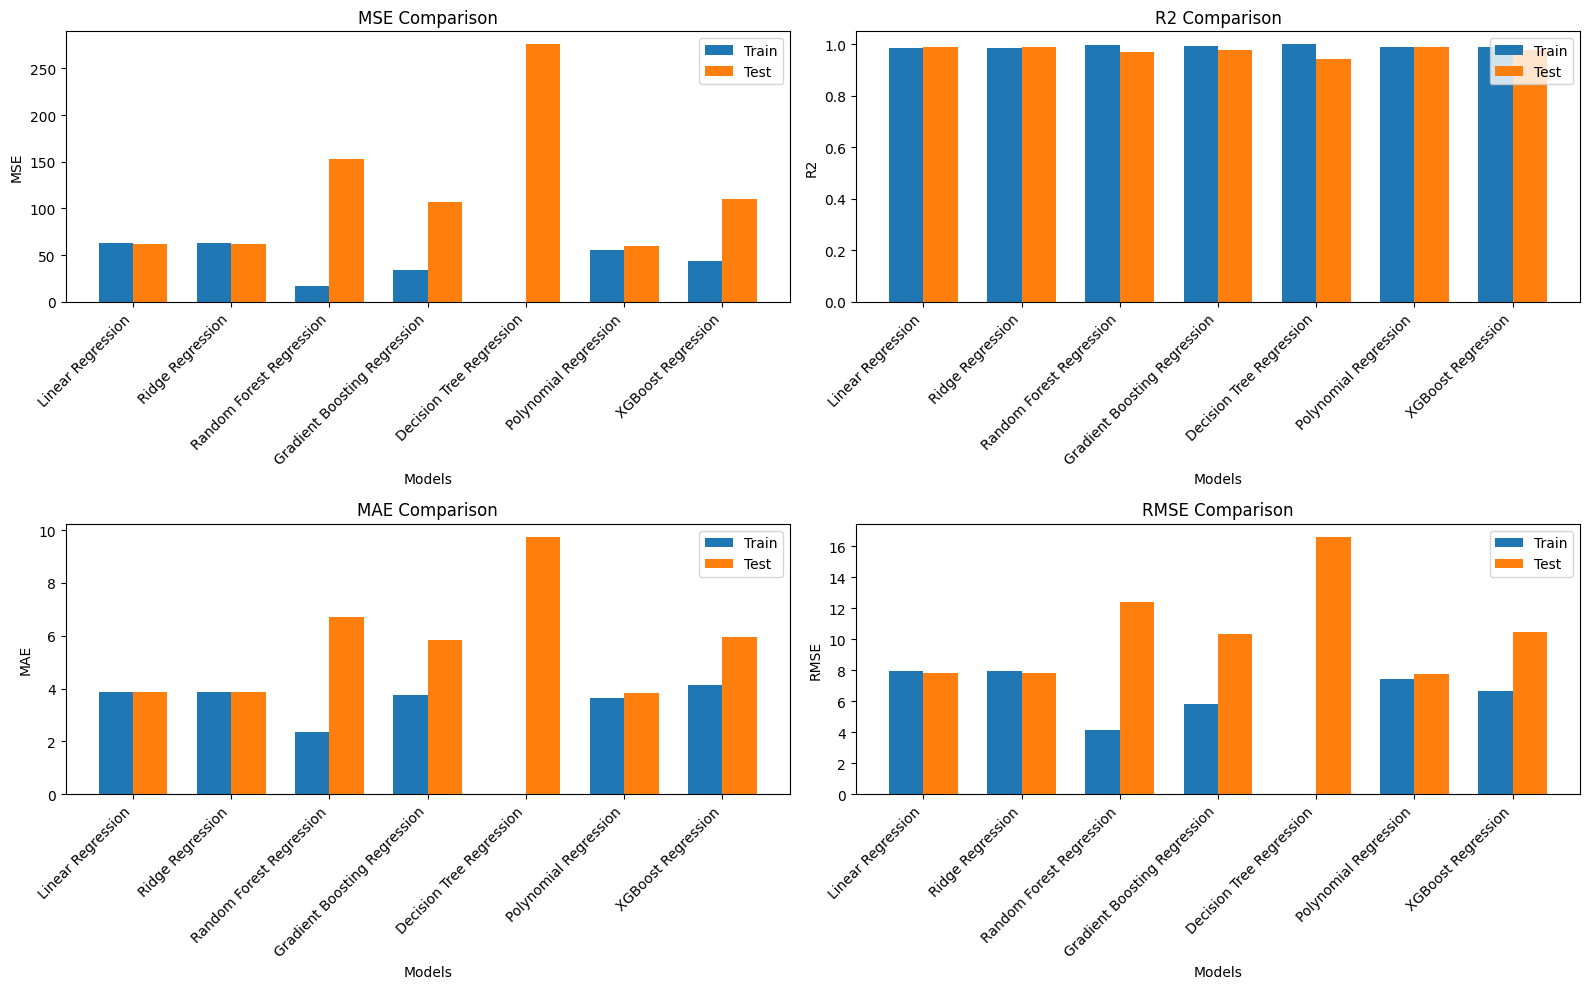

In [ ]:
# Extract evaluation metrics from the dictionary
models = list(eval_metrics.keys())
train_mse = [metrics['Train'][0] for metrics in eval_metrics.values()]
test_mse = [metrics['Test'][0] for metrics in eval_metrics.values()]
train_r2 = [metrics['Train'][1] for metrics in eval_metrics.values()]
test_r2 = [metrics['Test'][1] for metrics in eval_metrics.values()]
train_mae = [metrics['Train'][2] for metrics in eval_metrics.values()]
test_mae = [metrics['Test'][2] for metrics in eval_metrics.values()]
train_rmse = [metrics['Train'][3] for metrics in eval_metrics.values()]
test_rmse = [metrics['Test'][3] for metrics in eval_metrics.values()]

num_models = len(models)

# Set up the bar plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

# Position of bars on the x-axis
bar_positions = np.arange(num_models)

# Width of bars
bar_width = 0.35

# Plot the bars for each metric
for ax, metric_name, train_metric, test_metric in zip(axes, ['MSE', 'R2', 'MAE', 'RMSE'], [train_mse, train_r2, train_mae, train_rmse], [test_mse, test_r2, test_mae, test_rmse]):
    ax.bar(bar_positions, train_metric, bar_width, label='Train')
    ax.bar(bar_positions + bar_width, test_metric, bar_width, label='Test')
    ax.set_xticks(bar_positions + bar_width / 2)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} Comparison')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

**Target : Points Per Reception**

In [ ]:
url2='https://docs.google.com/spreadsheets/d/14HA_zUjddmshN4pUi4pq8m0awARhUa2i/edit#gid=632421914'

In [ ]:

new_url2 = convert_google_sheet_url(url2)

# Read the Excel file into a DataFrame
data_ppr = pd.read_csv(new_url2)

In [ ]:


# Now you can use the 'data' DataFrame as usual
print(data_ppr.head())

   Year  Rk                 Player Team FantPos  Age   G  Games Started  \
0  2023   1  Christian McCaffrey*+  SFO      RB   27  16             16   
1  2023   2          CeeDee Lamb*+  DAL      WR   24  17             17   
2  2023   3             Josh Allen  BUF      QB   27  17             17   
3  2023   4          Tyreek Hill*+  MIA      WR   29  16             16   
4  2023   5           Jalen Hurts*  PHI      QB   25  17             17   

   Passing Yds  Passing TD  ...   Rushing TD  Rec  Receiving Yds    Y/R  \
0            0           0  ...           14   67            564   8.42   
1            0           0  ...            2  135           1749  12.96   
2         4306          29  ...           15    0              0    NaN   
3            0           0  ...            0  119           1799  15.12   
4         3858          23  ...           15    0              0    NaN   

   Receiving TD  Fmb   FL    PPR  PosRank  OvRank  
0             7    3  2.0  391.3        1     

In [ ]:
# Replace NaN values with 0
data_ppr.fillna(0, inplace=True)
mapping_dict_ppr = {}
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_encoder_ppr = LabelEncoder()
data_label_encoded_ppr = data_ppr.copy()
for column in data_label_encoded_ppr.columns:
    if data_label_encoded_ppr[column].dtype == 'object':
        # Encode only if dtype is 'object'
        data_label_encoded_ppr[column] = label_encoder_ppr.fit_transform(data_label_encoded_ppr[column])
    # Store the mapping for the column
        mapping_dict_ppr[column] = {label: code for label, code in zip(label_encoder_ppr.classes_, label_encoder_ppr.transform(label_encoder_ppr.classes_))}

print("Label Encoded DataFrame:")

print(mapping_dict_ppr)


Label Encoded DataFrame:
{'Player': {'A.J. Brown': 0, 'A.J. Brown*': 1, 'A.J. Feeley': 2, 'A.J. Green': 3, 'A.J. Green*': 4, 'AJ Dillon': 5, 'Aaron Brooks': 6, 'Aaron Dobson': 7, 'Aaron Hernandez': 8, 'Aaron Jones': 9, 'Aaron Jones*': 10, 'Aaron Rodgers': 11, 'Aaron Rodgers*': 12, 'Aaron Rodgers*+': 13, 'Aaron Stecker': 14, 'Ace Sanders': 15, 'Adam Humphries': 16, 'Adam Thielen': 17, 'Adam Thielen*': 18, 'Adrian Peterson': 19, 'Adrian Peterson*': 20, 'Adrian Peterson*+': 21, 'Ahmad Bradshaw': 22, 'Ahman Green': 23, 'Ahman Green*': 24, "Aidan O'Connell": 25, 'Albert Wilson': 26, 'Alec Pierce': 27, 'Alex Collins': 28, 'Alex Green': 29, 'Alex Smith': 30, 'Alex Smith*': 31, 'Alexander Mattison': 32, 'Alfred Blue': 33, 'Alfred Morris': 34, 'Alfred Morris*': 35, 'Alge Crumpler': 36, 'Alge Crumpler*': 37, 'Allen Hurns': 38, 'Allen Lazard': 39, 'Allen Robinson': 40, 'Allen Robinson*': 41, 'Alshon Jeffery': 42, 'Alshon Jeffery*': 43, 'Alvin Kamara': 44, 'Alvin Kamara*': 45, 'Amani Toomer': 46, 

In [ ]:
data_label_encoded_ppr.columns

Index(['Year', 'Rk', 'Player', 'Team', 'FantPos', 'Age', 'G', 'Games Started',
       'Passing Yds', 'Passing TD', 'Int', 'Att', 'Rushing Yds', 'Y/A',
       ' Rushing TD', 'Rec', 'Receiving Yds', 'Y/R', 'Receiving TD', 'Fmb',
       'FL', 'PPR', 'PosRank', 'OvRank'],
      dtype='object')

In [ ]:
# Define features (X) and target variable (y)
# Let's say we want to predict "FantPt" and "PPR" (Fantasy Points and Points Per Reception)
features_ppr = data_label_encoded_ppr[['Age','Games Started','Passing Yds','Int','Receiving Yds','Rushing Yds',' Rushing TD','Receiving TD','Fmb']]
X_ppr = features_ppr
y_ppr = data_label_encoded_ppr['PPR']  # Points Per Reception


Performing Modelling with Points per reception as Target


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor  # Import XGBoost

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ppr, y_ppr, test_size=0.2, random_state=42)

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr_train = model_lr.predict(X_train)
predictions_lr_test = model_lr.predict(X_test)

# Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf_train = model_rf.predict(X_train)
predictions_rf_test = model_rf.predict(X_test)

# Gradient Boosting
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)
predictions_gb_train = model_gb.predict(X_train)
predictions_gb_test = model_gb.predict(X_test)

# Decision Tree
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
predictions_dt_train = model_dt.predict(X_train)
predictions_dt_test = model_dt.predict(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
predictions_poly_train = model_poly.predict(X_train_poly)
predictions_poly_test = model_poly.predict(X_test_poly)

# Initialize SVM regressor
svm_regressor = SVR(kernel='rbf')  # RBF kernel is commonly used for SVM regression

# Train the model
svm_regressor.fit(X_train, y_train)

# Make predictions on train and test sets
svm_train_predictions = svm_regressor.predict(X_train)
svm_test_predictions = svm_regressor.predict(X_test)

# Bagging with SVM
bagged_svm_regressor = BaggingRegressor(base_estimator=SVR(kernel='rbf'), n_estimators=10, random_state=42)
bagged_svm_regressor.fit(X_train, y_train)

# Make predictions on train and test sets
bagged_svm_train_predictions = bagged_svm_regressor.predict(X_train)
bagged_svm_test_predictions = bagged_svm_regressor.predict(X_test)

# XGBoost Regressor
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)
predictions_xgb_train = model_xgb.predict(X_train)
predictions_xgb_test = model_xgb.predict(X_test)

# Define function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, r2, mae, rmse

# Calculate evaluation metrics for each model
eval_metrics = {}

models = {
    'Linear Regression': (predictions_lr_train, predictions_lr_test),
    'Random Forest Regressor': (predictions_rf_train, predictions_rf_test),
    'Gradient Boosting': (predictions_gb_train, predictions_gb_test),
    'SVM': (svm_train_predictions, svm_test_predictions),
    'Bagged_SVM': (bagged_svm_train_predictions, bagged_svm_test_predictions),
    'Decision Tree': (predictions_dt_train, predictions_dt_test),
    'Polynomial Regression': (predictions_poly_train, predictions_poly_test),
    'XGBoost Regressor': (predictions_xgb_train, predictions_xgb_test)  # Add XGBoost to the models dictionary
}

for name, (predictions_train, predictions_test) in models.items():
    eval_metrics[name] = {}
    eval_metrics[name]['Train'] = evaluate_model(y_train, predictions_train)
    eval_metrics[name]['Test'] = evaluate_model(y_test, predictions_test)

# Print evaluation metrics
for name, metrics in eval_metrics.items():
    print(f"\n{name}:")
    for dataset, (mse, r2, mae, rmse) in metrics.items():
        print(f"{dataset} - MSE: {mse:.2f}, R2: {r2:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Linear Regression:
Train - MSE: 141.09, R2: 0.97, MAE: 8.96, RMSE: 11.88
Test - MSE: 140.38, R2: 0.97, MAE: 8.90, RMSE: 11.85

Random Forest Regressor:
Train - MSE: 32.03, R2: 0.99, MAE: 4.00, RMSE: 5.66
Test - MSE: 255.18, R2: 0.95, MAE: 11.00, RMSE: 15.97

Gradient Boosting:
Train - MSE: 169.88, R2: 0.97, MAE: 10.08, RMSE: 13.03
Test - MSE: 253.27, R2: 0.95, MAE: 11.74, RMSE: 15.91

SVM:
Train - MSE: 748.68, R2: 0.85, MAE: 18.94, RMSE: 27.36
Test - MSE: 881.12, R2: 0.84, MAE: 20.68, RMSE: 29.68

Bagged_SVM:
Train - MSE: 751.90, R2: 0.85, MAE: 18.95, RMSE: 27.42
Test - MSE: 888.66, R2: 0.84, MAE: 20.71, RMSE: 29.81

Decision Tree:
Train - MSE: 0.00, R2: 1.00, MAE: 0.00, RMSE: 0.00
Test - MSE: 556.17, R2: 0.90, MAE: 16.33, RMSE: 23.58

Polynomial Regression:
Train - MSE: 116.60, R2: 0.98, MAE: 8.05, RMSE: 10.80
Test - MSE: 124.26, R2: 0.98, MAE: 8.22, RMSE: 11.15

XGBoost Regressor:
Train - MSE: 30.44, R2: 0.99, MAE: 4.05, RMSE: 5.52
Test - MSE: 244.61, R2: 0.96, MAE: 11.31, RMSE: 15.

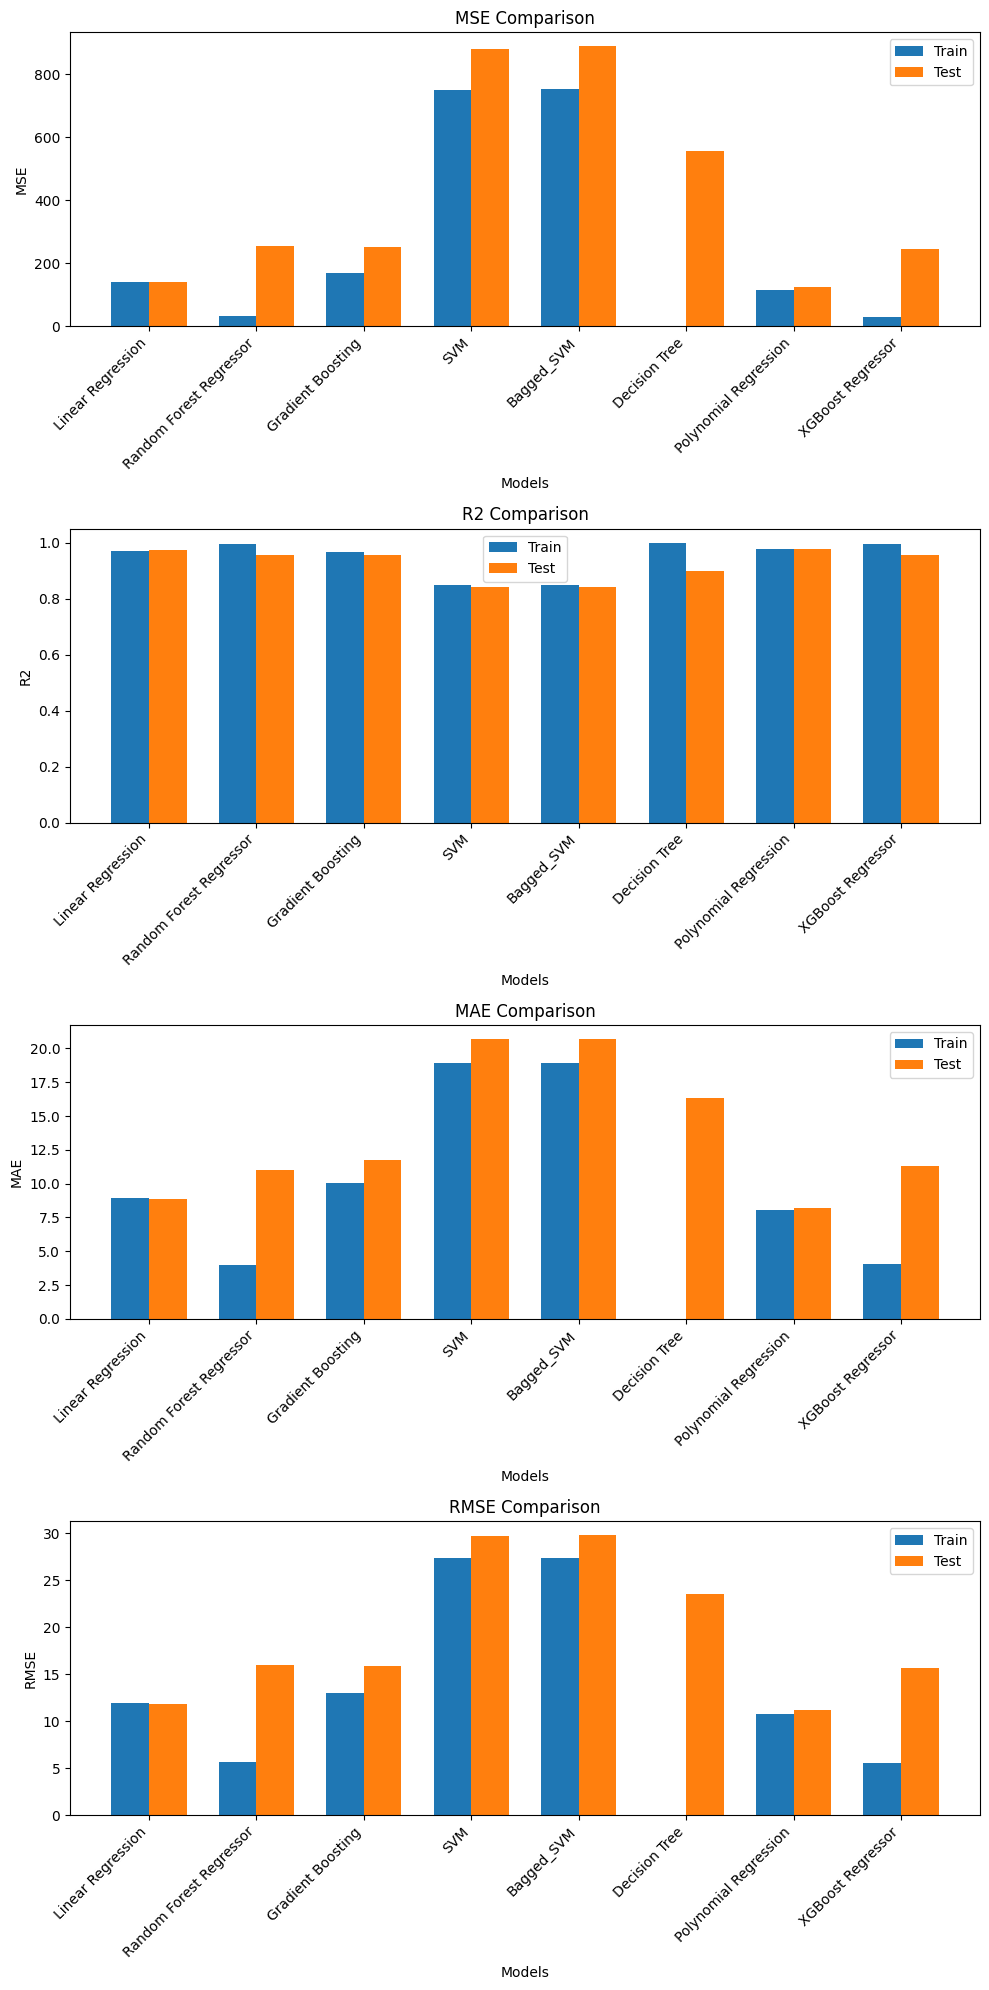

In [ ]:
# Extract evaluation metrics from the dictionary
models = list(eval_metrics.keys())
train_metrics = {metric: [metrics['Train'][i] for metrics in eval_metrics.values()] for i, metric in enumerate(['MSE', 'R2', 'MAE', 'RMSE'])}
test_metrics = {metric: [metrics['Test'][i] for metrics in eval_metrics.values()] for i, metric in enumerate(['MSE', 'R2', 'MAE', 'RMSE'])}

num_metrics = len(train_metrics)

# Set up the bar plots
fig, axes = plt.subplots(nrows=num_metrics, ncols=1, figsize=(10, 20))

# Position of bars on the x-axis
bar_positions = np.arange(len(models))

# Width of bars
bar_width = 0.35

# Plot the bars for each metric
for i, metric in enumerate(train_metrics.keys()):
    ax = axes[i]
    ax.bar(bar_positions, train_metrics[metric], bar_width, label='Train')
    ax.bar(bar_positions + bar_width, test_metrics[metric], bar_width, label='Test')
    ax.set_xticks(bar_positions + bar_width / 2)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import xgboost as xgb

# Define a function for hyperparameter tuning and evaluation
def tune_and_evaluate_model(model, param_grid, X_train, X_test, y_train, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    return best_model, best_params, mse_train, mse_test, r2_train, r2_test, mae_train, mae_test, rmse_train, rmse_test

# Define a function for evaluating model without hyperparameter tuning
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    return mse_train, mse_test, r2_train, r2_test, mae_train, mae_test, rmse_train, rmse_test

# Example data
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y_fantpt, test_size=0.2, random_state=42)

# Define evaluation metrics dictionary
eval_metrics = {}

# Linear Regression
linear_model = LinearRegression()
linear_mse_train, linear_mse_test, linear_r2_train, linear_r2_test, linear_mae_train, linear_mae_test, linear_rmse_train, linear_rmse_test = evaluate_model(linear_model, X_train, X_test, y_train, y_test)
eval_metrics['Linear Regression'] = {'Train': (linear_mse_train, linear_r2_train, linear_mae_train, linear_rmse_train), 'Test': (linear_mse_test, linear_r2_test, linear_mae_test, linear_rmse_test)}

# Ridge Regression
ridge_param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_model = Ridge()
best_ridge_model, ridge_best_params, ridge_mse_train, ridge_mse_test, ridge_r2_train, ridge_r2_test, ridge_mae_train, ridge_mae_test, ridge_rmse_train, ridge_rmse_test = tune_and_evaluate_model(ridge_model, ridge_param_grid, X_train, X_test, y_train, y_test)
eval_metrics['Ridge Regression'] = {'Train': (ridge_mse_train, ridge_r2_train, ridge_mae_train, ridge_rmse_train), 'Test': (ridge_mse_test, ridge_r2_test, ridge_mae_test, ridge_rmse_test)}

# Random Forest Regressor
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20, 30]}
rf_model = RandomForestRegressor()
best_rf_model, rf_best_params, rf_mse_train, rf_mse_test, rf_r2_train, rf_r2_test, rf_mae_train, rf_mae_test, rf_rmse_train, rf_rmse_test = tune_and_evaluate_model(rf_model, rf_param_grid, X_train, X_test, y_train, y_test)
eval_metrics['Random Forest Regression'] = {'Train': (rf_mse_train, rf_r2_train, rf_mae_train, rf_rmse_train), 'Test': (rf_mse_test, rf_r2_test, rf_mae_test, rf_rmse_test)}

# Gradient Boosting Regressor
gb_param_grid = {'n_estimators': [100, 200, 300],
                 'learning_rate': [0.01, 0.1, 0.2]}
gb_model = GradientBoostingRegressor()
best_gb_model, gb_best_params, gb_mse_train, gb_mse_test, gb_r2_train, gb_r2_test, gb_mae_train, gb_mae_test, gb_rmse_train, gb_rmse_test = tune_and_evaluate_model(gb_model, gb_param_grid, X_train, X_test, y_train, y_test)
eval_metrics['Gradient Boosting Regression'] = {'Train': (gb_mse_train, gb_r2_train, gb_mae_train, gb_rmse_train), 'Test': (gb_mse_test, gb_r2_test, gb_mae_test, gb_rmse_test)}

# Decision Tree Regressor
dt_param_grid = {'max_depth': [None, 10, 20, 30]}
dt_model = DecisionTreeRegressor()
best_dt_model, dt_best_params, dt_mse_train, dt_mse_test, dt_r2_train, dt_r2_test, dt_mae_train, dt_mae_test, dt_rmse_train, dt_rmse_test = tune_and_evaluate_model(dt_model, dt_param_grid, X_train, X_test, y_train, y_test)
eval_metrics['Decision Tree Regression'] = {'Train': (dt_mse_train, dt_r2_train, dt_mae_train, dt_rmse_train), 'Test': (dt_mse_test, dt_r2_test, dt_mae_test, dt_rmse_test)}

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg_model = Ridge()
best_poly_reg_model, poly_best_params, poly_mse_train, poly_mse_test, poly_r2_train, poly_r2_test, poly_mae_train, poly_mae_test, poly_rmse_train, poly_rmse_test = tune_and_evaluate_model(poly_reg_model, ridge_param_grid, X_poly_train, X_poly_test, y_train, y_test)
eval_metrics['Polynomial Regression'] = {'Train': (poly_mse_train, poly_r2_train, poly_mae_train, poly_rmse_train), 'Test': (poly_mse_test, poly_r2_test, poly_mae_test, poly_rmse_test)}

# XGBoost Regressor
xgb_param_grid = {'max_depth': [3, 5, 7],
                  'learning_rate': [0.01, 0.1, 0.2],
                  'n_estimators': [100, 200, 300]}
xgb_model = xgb.XGBRegressor()
best_xgb_model, xgb_best_params, xgb_mse_train, xgb_mse_test, xgb_r2_train, xgb_r2_test, xgb_mae_train, xgb_mae_test, xgb_rmse_train, xgb_rmse_test = tune_and_evaluate_model(xgb_model, xgb_param_grid, X_train, X_test, y_train, y_test)
eval_metrics['XGBoost Regression'] = {'Train': (xgb_mse_train, xgb_r2_train, xgb_mae_train, xgb_rmse_train), 'Test': (xgb_mse_test, xgb_r2_test, xgb_mae_test, xgb_rmse_test)}

# Print evaluation metrics
for name, metrics in eval_metrics.items():
    print(f"\n{name}:")
    for dataset, (mse, r2, mae, rmse) in metrics.items():
        print(f"{dataset} - MSE: {mse:.2f}, R2: {r2:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.47041e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.41508e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.43896e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49081e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin


Linear Regression:
Train - MSE: 141.09, R2: 0.97, MAE: 8.96, RMSE: 11.88
Test - MSE: 140.38, R2: 0.97, MAE: 8.90, RMSE: 11.85

Ridge Regression:
Train - MSE: 141.09, R2: 0.97, MAE: 8.96, RMSE: 11.88
Test - MSE: 140.35, R2: 0.97, MAE: 8.90, RMSE: 11.85

Random Forest Regression:
Train - MSE: 31.46, R2: 0.99, MAE: 3.96, RMSE: 5.61
Test - MSE: 250.71, R2: 0.95, MAE: 10.95, RMSE: 15.83

Gradient Boosting Regression:
Train - MSE: 91.47, R2: 0.98, MAE: 7.44, RMSE: 9.56
Test - MSE: 188.46, R2: 0.97, MAE: 10.10, RMSE: 13.73

Decision Tree Regression:
Train - MSE: 0.00, R2: 1.00, MAE: 0.00, RMSE: 0.00
Test - MSE: 520.05, R2: 0.91, MAE: 16.17, RMSE: 22.80

Polynomial Regression:
Train - MSE: 116.61, R2: 0.98, MAE: 8.05, RMSE: 10.80
Test - MSE: 124.23, R2: 0.98, MAE: 8.21, RMSE: 11.15

XGBoost Regression:
Train - MSE: 77.89, R2: 0.98, MAE: 6.78, RMSE: 8.83
Test - MSE: 187.71, R2: 0.97, MAE: 9.92, RMSE: 13.70


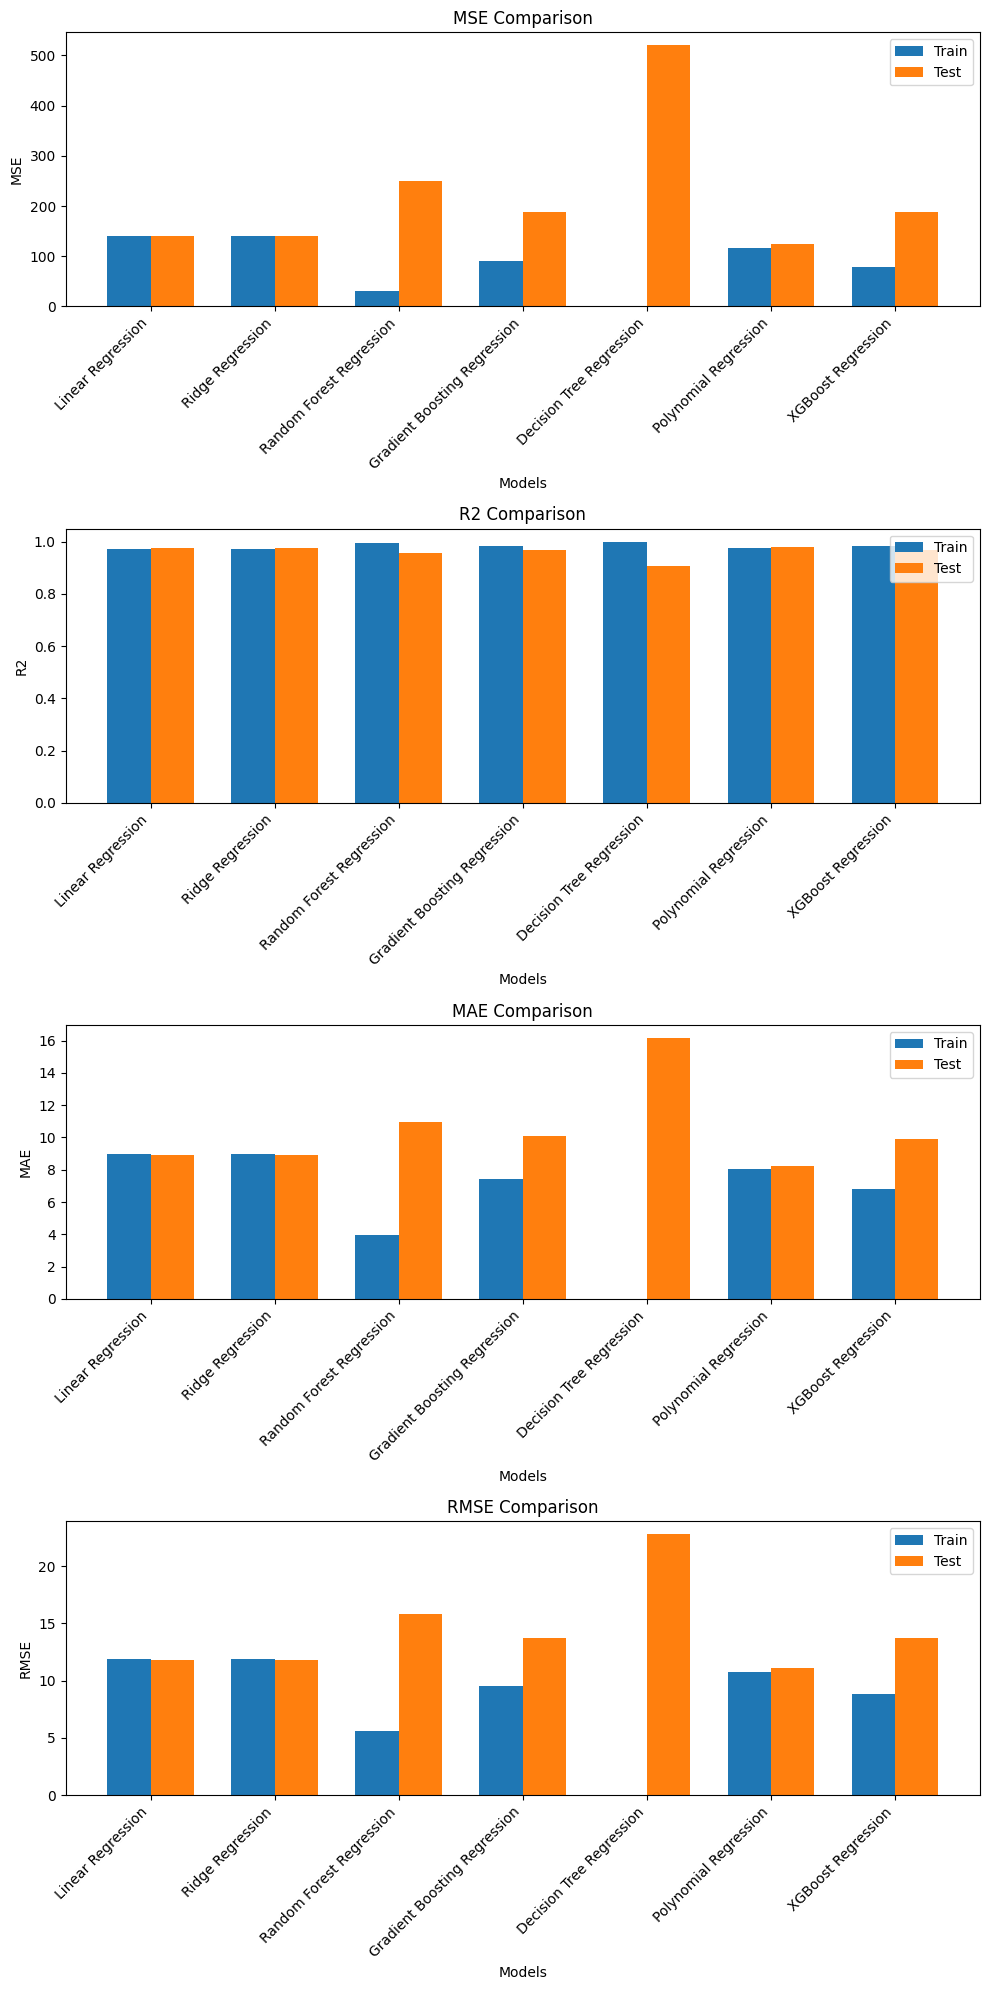

In [ ]:
# Extract evaluation metrics from the dictionary
models = list(eval_metrics.keys())
train_metrics = {metric: [metrics['Train'][i] for metrics in eval_metrics.values()] for i, metric in enumerate(['MSE', 'R2', 'MAE', 'RMSE'])}
test_metrics = {metric: [metrics['Test'][i] for metrics in eval_metrics.values()] for i, metric in enumerate(['MSE', 'R2', 'MAE', 'RMSE'])}

num_metrics = len(train_metrics)

# Set up the bar plots
fig, axes = plt.subplots(nrows=num_metrics, ncols=1, figsize=(10, 20))

# Position of bars on the x-axis
bar_positions = np.arange(len(models))

# Width of bars
bar_width = 0.35

# Plot the bars for each metric
for i, metric in enumerate(train_metrics.keys()):
    ax = axes[i]
    ax.bar(bar_positions, train_metrics[metric], bar_width, label='Train')
    ax.bar(bar_positions + bar_width, test_metrics[metric], bar_width, label='Test')
    ax.set_xticks(bar_positions + bar_width / 2)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Research Question 2**

Team Success Prediction: Additionally, by grouping players by their respective teams, can we utilize their fantasy football statistics to forecast their team's performance in a given season? We will explore correlations between individual player performance and team success, aiming to develop predictive models that can anticipate a team's record based on the aggregated performance of its players.

In [ ]:
url3='https://docs.google.com/spreadsheets/d/1WuWoS634IOtQHwjjZu7hH66dYMu09TsM/edit#gid=1248187819'

In [ ]:

new_url3 = convert_google_sheet_url(url3)

# Read the Excel file into a DataFrame
data_2 = pd.read_csv(new_url3)

In [ ]:

# Now you can use the 'data' DataFrame as usual
print(data_2.head())

   Year  Week  Day        Date     Time             Winner/tie Unnamed: 6  \
0  2023     1  Thu  2023-09-07  8:20 PM          Detroit Lions          @   
1  2023     1  Sun  2023-09-10  1:00 PM        Atlanta Falcons        NaN   
2  2023     1  Sun  2023-09-10  1:00 PM       Cleveland Browns        NaN   
3  2023     1  Sun  2023-09-10  1:00 PM   Jacksonville Jaguars          @   
4  2023     1  Sun  2023-09-10  1:00 PM  Washington Commanders        NaN   

            Loser/tie Unnamed: 8  PtsW  PtsL  YdsW  TOW  YdsL  TOL  
0  Kansas City Chiefs   boxscore    21    20   368    1   316    1  
1   Carolina Panthers   boxscore    24    10   221    0   281    3  
2  Cincinnati Bengals   boxscore    24     3   350    2   142    0  
3  Indianapolis Colts   boxscore    31    21   342    2   280    3  
4   Arizona Cardinals   boxscore    20    16   248    3   210    2  


In [ ]:
data_2.columns

Index(['Year', 'Week', 'Day', 'Date', 'Time', 'Winner/tie', 'Unnamed: 6',
       'Loser/tie', 'Unnamed: 8', 'PtsW', 'PtsL', 'YdsW', 'TOW', 'YdsL',
       'TOL'],
      dtype='object')

In [ ]:
filtered_data = data_2[['Year', 'Winner/tie', 'YdsW', 'YdsL']]

# Group by year and team, aggregate yards gained and yards lost
grouped_data = filtered_data.groupby(['Year', 'Winner/tie']).agg({'YdsW': 'sum', 'YdsL': 'sum'}).reset_index()

# Sort teams within each year by number of wins/ties
grouped_data = grouped_data.sort_values(by=['Year', 'Winner/tie'], ascending=[True, False])

# Rank the teams
grouped_data['Rank'] = grouped_data.groupby('Year')['Winner/tie'].rank(ascending=False)

# Display top 32 teams by number of wins/ties each year
for year in grouped_data['Year'].unique():
    print(f"Year: {year}")
    year_data = grouped_data[grouped_data['Year'] == year].head(32)
    print(year_data[['Rank', 'Winner/tie' ,'YdsW', 'YdsL']])

Year: 2004
    Rank            Winner/tie  YdsW  YdsL
31   1.0   Washington Redskins  1865  1370
30   2.0      Tennessee Titans  1664  1682
29   3.0  Tampa Bay Buccaneers  1629  1329
28   4.0        St. Louis Rams  3283  2326
27   5.0      Seattle Seahawks  3159  2719
26   6.0   San Francisco 49ers   800   694
25   7.0    San Diego Chargers  4309  3889
24   8.0   Pittsburgh Steelers  4874  3875
23   9.0   Philadelphia Eagles  5008  3968
22  10.0       Oakland Raiders  1779  1830
21  11.0         New York Jets  3684  2819
20  12.0       New York Giants  1924  1877
19  13.0    New Orleans Saints  2780  2841
18  14.0  New England Patriots  5152  4324
17  15.0     Minnesota Vikings  3396  2901
16  16.0        Miami Dolphins  1034  1203
15  17.0    Kansas City Chiefs  3254  2542
14  18.0  Jacksonville Jaguars  2747  2768
13  19.0    Indianapolis Colts  4878  4070
12  20.0        Houston Texans  2371  2017
11  21.0     Green Bay Packers  4063  3068
10  22.0         Detroit Lions  1792  1815


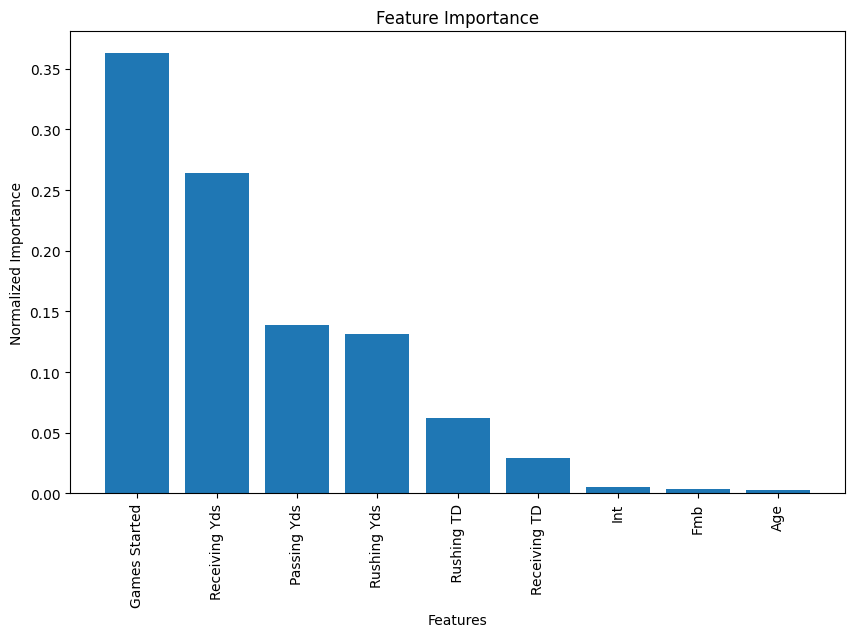

In [ ]:

# Feature importance for Random Forest Regressor
rf_feature_importance = model_rf.feature_importances_

# Feature importance for Gradient Boosting
gb_feature_importance = model_gb.feature_importances_

# Combine feature importance from both models
feature_importance = rf_feature_importance + gb_feature_importance

# Normalize feature importance scores
feature_importance_normalized = feature_importance / np.sum(feature_importance)

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importance_normalized)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importance_normalized[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.show()


In [ ]:
# Load the datasets
fantasy_players_data = data
# Load the Excel file
#file_path = "NFL Game by Game Result Data.xlsx"
df = data_2

# Define a dictionary mapping full team names to short forms
team_name_mapping = {
    'Detroit Lions': 'DET',
    'Atlanta Falcons': 'ATL',
    'Cleveland Browns': 'CLE',
    'Jacksonville Jaguars': 'JAX',
    'Washington Commanders': 'WAS',
    'Baltimore Ravens': 'BAL',
    'Tampa Bay Buccaneers': 'TAM',
    'New Orleans Saints': 'NOR',
    'San Francisco 49ers': 'SFO',
    'Green Bay Packers': 'GNB',
    'Las Vegas Raiders': 'LVR',
    'Miami Dolphins': 'MIA',
    'Philadelphia Eagles': 'PHI',
    'Los Angeles Rams': 'LAR',
    'Dallas Cowboys': 'DAL',
    'New York Jets': 'NYJ',
    'Buffalo Bills': 'BUF',
    'Indianapolis Colts': 'IND',
    'Seattle Seahawks': 'SEA',
    'Kansas City Chiefs': 'KAN',
    'Tennessee Titans': 'TEN',
    'New York Giants': 'NYG',
    'Pittsburgh Steelers': 'PIT',
    'Houston Texans': 'HOU',
    'Los Angeles Chargers': 'LAC',
    'New England Patriots': 'NWE',
    'Arizona Cardinals': 'ARI',
    'Cincinnati Bengals': 'CIN',
    'Minnesota Vikings': 'MIN',
    'Denver Broncos': 'DEN',
    'Chicago Bears': 'CHI',
    'Carolina Panthers': 'CAR',
    'Washington Football Team': 'WAS',
    'Oakland Raiders': 'OAK',
    'Washington Redskins': 'WAS',
    'San Diego Chargers': 'SDG',
    'St. Louis Rams': 'STL'
}

# Replace full team names with short forms in the "Winner/tie" column
data_2['Winner/tie'] = data_2['Winner/tie'].replace(team_name_mapping)

# Rename the "Winner/tie" column to "teams"
df = data_2.rename(columns={'Winner/tie': 'teams'})

# Display the modified DataFrame
print(df)


      Year  Week  Day        Date     Time teams Unnamed: 6  \
0     2023     1  Thu  2023-09-07  8:20 PM   DET          @   
1     2023     1  Sun  2023-09-10  1:00 PM   ATL        NaN   
2     2023     1  Sun  2023-09-10  1:00 PM   CLE        NaN   
3     2023     1  Sun  2023-09-10  1:00 PM   JAX          @   
4     2023     1  Sun  2023-09-10  1:00 PM   WAS        NaN   
...    ...   ...  ...         ...      ...   ...        ...   
5162  2004    17  Sun  2005-01-02  4:06 PM   ARI        NaN   
5163  2004    17  Sun  2005-01-02  4:15 PM   DEN        NaN   
5164  2004    17  Sun  2005-01-02  4:15 PM   JAX          @   
5165  2004    17  Sun  2005-01-02  4:15 PM   SDG        NaN   
5166  2004    17  Sun  2005-01-02  8:36 PM   NYG        NaN   

                 Loser/tie Unnamed: 8  PtsW  PtsL  YdsW  TOW  YdsL  TOL  
0       Kansas City Chiefs   boxscore    21    20   368    1   316    1  
1        Carolina Panthers   boxscore    24    10   221    0   281    3  
2       Cincinnati Be

In [ ]:
print(team_wins.columns)

Index(['SFO', 'DAL', 'BUF', 'MIA', 'PHI', 'MIA', 'DET', 'DAL', 'TAM', 'BAL',
       ...
       'PIT', 'CAR', 'DAL', 'TAM', 'GNB', 'CAR', 'BUF', 'SFO', 'DEN', 'CAR'],
      dtype='object', name='Tm', length=4000)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of wins for each team
team_wins = data_2['Winner/tie'].value_counts().reset_index()


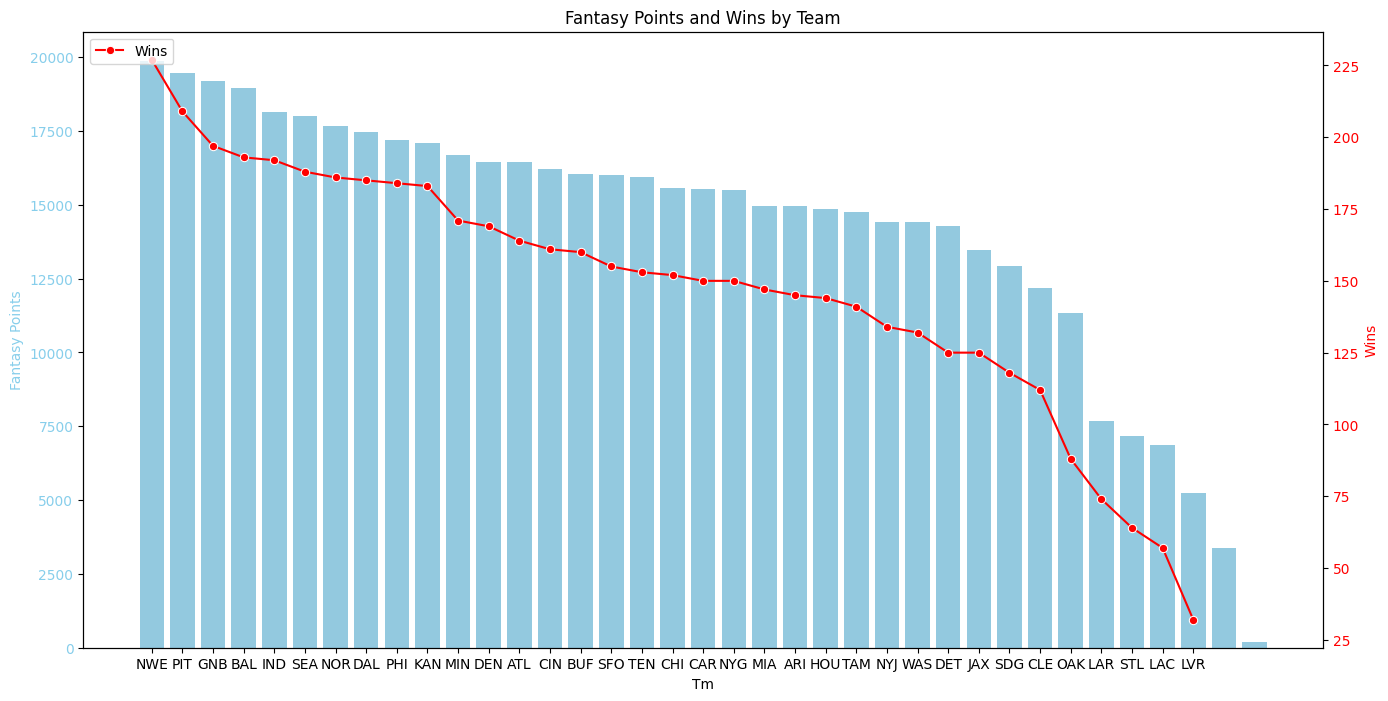

In [ ]:
import seaborn as sns

# Load the data
fantasy_data = data
game_results_data =data_2

# Group by team and aggregate fantasy points
fantasy_points = fantasy_data.groupby('Tm')['FantPt'].sum().reset_index().sort_values(by='FantPt', ascending=False)

# Count the number of wins for each team
team_wins = game_results_data['Winner/tie'].value_counts().reset_index()
team_wins = team_wins.rename(columns={'index': 'Tm', 'Winner/tie': 'Wins'}).sort_values(by='Wins', ascending=False)

# Sort team_wins DataFrame by team names
team_wins = team_wins.sort_values(by='count',ascending=False)

# Sort data DataFrame by 'FantPt' in descending order
data_sorted = data.sort_values(by='FantPt', ascending=False)
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar plot for fantasy points
sns.barplot(x='Tm', y='FantPt', data=fantasy_points, ax=ax1, color='skyblue')
ax1.set_ylabel('Fantasy Points', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create another y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Line plot for number of wins
sns.lineplot(x='Wins', y='count', data=team_wins, ax=ax2, color='red', marker='o', sort=False)
ax2.set_ylabel('Wins', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Title and legend
plt.title('Fantasy Points and Wins by Team')
plt.legend(labels=['Wins'], loc='upper left')

# Show plot
plt.show()


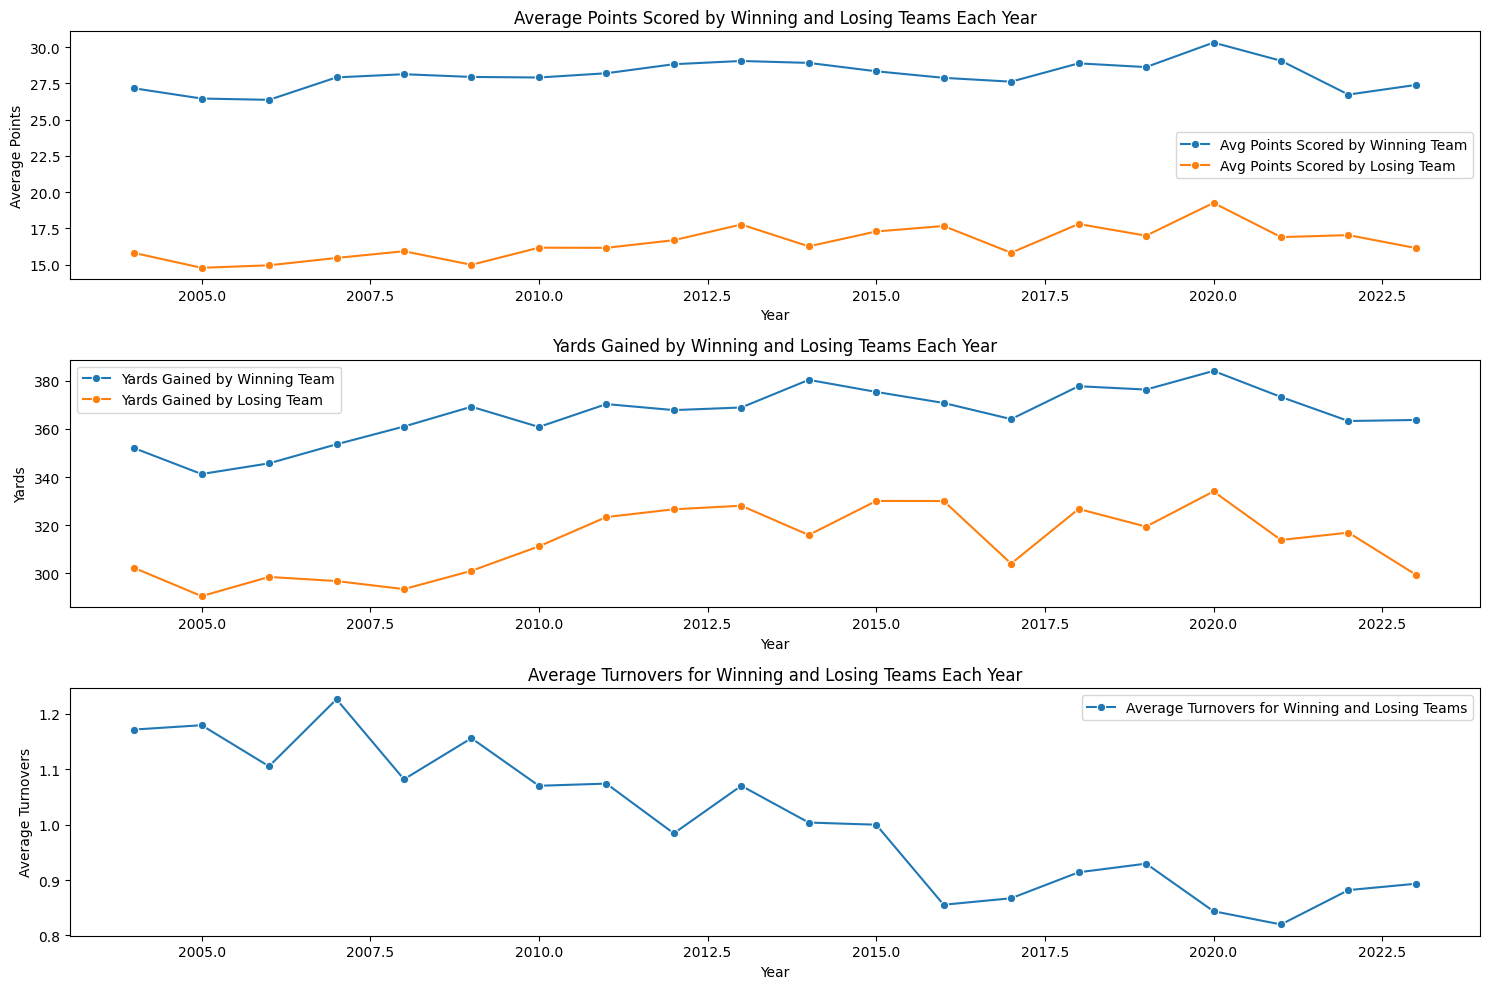

In [ ]:
# Extract relevant columns
relevant_columns = ["Year", "PtsW", "PtsL", "YdsW", "YdsL", "TOW"]
data = data_2[relevant_columns]

# Group the data by year and calculate averages
avg_points = data.groupby('Year')[['PtsW', 'PtsL']].mean().reset_index()
avg_yards = data.groupby('Year')[['YdsW', 'YdsL']].mean().reset_index()
avg_turnovers = data.groupby('Year')[['TOW']].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 10))

# Average points scored by winning and losing teams
plt.subplot(3, 1, 1)
sns.lineplot(x='Year', y='PtsW', data=avg_points, marker='o', label='Avg Points Scored by Winning Team')
sns.lineplot(x='Year', y='PtsL', data=avg_points, marker='o', label='Avg Points Scored by Losing Team')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.title('Average Points Scored by Winning and Losing Teams Each Year')
plt.legend()

# Yards gained by winning and losing teams
plt.subplot(3, 1, 2)
sns.lineplot(x='Year', y='YdsW', data=avg_yards, marker='o', label='Yards Gained by Winning Team')
sns.lineplot(x='Year', y='YdsL', data=avg_yards, marker='o', label='Yards Gained by Losing Team')
plt.xlabel('Year')
plt.ylabel('Yards')
plt.title('Yards Gained by Winning and Losing Teams Each Year')
plt.legend()

# Turnovers for winning and losing teams
plt.subplot(3, 1, 3)
sns.lineplot(x='Year', y='TOW', data=avg_turnovers, marker='o', label='Average Turnovers for Winning and Losing Teams')
plt.xlabel('Year')
plt.ylabel('Average Turnovers')
plt.title('Average Turnovers for Winning and Losing Teams Each Year')
plt.legend()

plt.tight_layout()
plt.show()